### Load images and annotations

In [28]:
import os

def get_images(images_folder):
  # Get paths of all labels
  labels = os.listdir(images_folder)
  for i in range(len(labels)):
    labels[i] = os.path.join(images_folder, labels[i])
  
  # Get paths of all images
  images = []
  for label in labels:
    tmp = os.listdir(label)
    for image in tmp:
      images.append(os.path.join(label, image))

  # Return list contains paths of all images
  return images

def get_annotations(annotations_folder):
  # Get paths of all json file
  files = os.listdir(annotations_folder)
  for i in range(len(files)):
    files[i] = os.path.join(annotations_folder, files[i])

  # Get bounding box of all images
  annotations = []
  for file in files:
    f = open(file)
    anno_dict = json.load(f)
    keys = list(anno_dict.keys())
    for key in keys:
      tmp = (key, anno_dict[key]['bboxes'])
      annotations.append(tmp)

  # Return list contains names and bboxes of images
  return annotations

def get_image_with_name(name, images):
  for image in images:
    if name in image:
      return image
  print('Can not find suitable image')
  return None

In [29]:
image_folder = '..\datasets\HAGRID\subsample'
images = get_images(image_folder)

print(len(images))
for i in images[:10]:
  print(i)

1800
..\datasets\HAGRID\subsample\call\01898f3e-8422-4e6a-a056-30206f905640.jpg
..\datasets\HAGRID\subsample\call\0516ab39-9dd3-41bf-9707-ccea0dbf985f.jpg
..\datasets\HAGRID\subsample\call\055cbe75-f563-49e2-9c4f-86a1fb47b40f.jpg
..\datasets\HAGRID\subsample\call\082b2083-c056-4735-a9f6-3df3593283d9.jpg
..\datasets\HAGRID\subsample\call\09732089-243c-47e6-a314-264fae24871e.jpg
..\datasets\HAGRID\subsample\call\09ee9bcb-076d-4a3a-9704-0982cbc152fd.jpg
..\datasets\HAGRID\subsample\call\0d303909-120a-41e9-9005-e445e955982d.jpg
..\datasets\HAGRID\subsample\call\0da8ed9e-0d13-4e04-8abd-607da9c1e93c.jpg
..\datasets\HAGRID\subsample\call\10120783-c282-4ad1-b84f-52f158ab593d.jpg
..\datasets\HAGRID\subsample\call\10526473-f2df-4722-8989-3dbc78bc36f2.jpg


In [30]:
annotation_folder = '..\datasets\HAGRID\\ann_subsample'
annotations = get_annotations(annotation_folder)

print(len(annotations))
for i in annotations[:10]:
  print(i)

1800
('01898f3e-8422-4e6a-a056-30206f905640', [[0.42538839, 0.21308209, 0.05382926, 0.11273142]])
('0516ab39-9dd3-41bf-9707-ccea0dbf985f', [[0.40016984, 0.3223251, 0.13044141, 0.12870407]])
('055cbe75-f563-49e2-9c4f-86a1fb47b40f', [[0.48937548, 0.56126298, 0.1826894, 0.07676647]])
('082b2083-c056-4735-a9f6-3df3593283d9', [[0.56409572, 0.19575476, 0.09491629, 0.11982146], [0.82368615, 0.78257268, 0.06801224, 0.1426053]])
('09732089-243c-47e6-a314-264fae24871e', [[0.27973014, 0.3370414, 0.20686737, 0.14207432]])
('09ee9bcb-076d-4a3a-9704-0982cbc152fd', [[0.42639135, 0.36274419, 0.12887326, 0.09358317], [0.68150371, 0.82525372, 0.06819769, 0.08949067]])
('0d303909-120a-41e9-9005-e445e955982d', [[0.31775187, 0.37929956, 0.20512597, 0.12766728]])
('0da8ed9e-0d13-4e04-8abd-607da9c1e93c', [[0.53599301, 0.45531892, 0.13616335, 0.12178375]])
('10120783-c282-4ad1-b84f-52f158ab593d', [[0.42719306, 0.27024956, 0.09366488, 0.07039867]])
('10526473-f2df-4722-8989-3dbc78bc36f2', [[0.20501269, 0.33981

### Double check - 1

In [49]:
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def doublecheck(images, annotations, width = 640, height = 480):
  # Get 36 random annotations
  idlist = []
  for _ in range(36):
    idlist.append(random.randint(0, 1799))

  # Check each annotation
  h, w = 0, 0
  fig, ax = plt.subplots(6, 6, figsize = (12, 12))
  for idx in idlist:
    anno = annotations[idx]
    name, bboxes = anno[0], anno[1]
    # Get image's path
    img = get_image_with_name(name, images)
    # Extract each bbox
    for box in bboxes:
      # Change from YOLO format to normal bbox
      box_min_x = float(box[0]) * width
      box_min_y = float(box[1]) * height
      box_width = float(box[2]) * width
      box_height = float(box[3]) * height

      # Load and resize image
      image = cv2.imread(img)
      image = cv2.resize(image, dsize = (width, height), interpolation = cv2.INTER_CUBIC)

      # Visualize image
      ax[h, w].imshow(image)
      rect = patches.Rectangle((box_min_x, box_min_y), box_width, box_height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
      ax[h, w].add_patch(rect)
      ax[h, w].axis('off')

    h += 1
    if h == 6:
      h = 0
      w += 1

  # Save images
  plt.savefig("double_check.png", bbox_inches = 'tight')

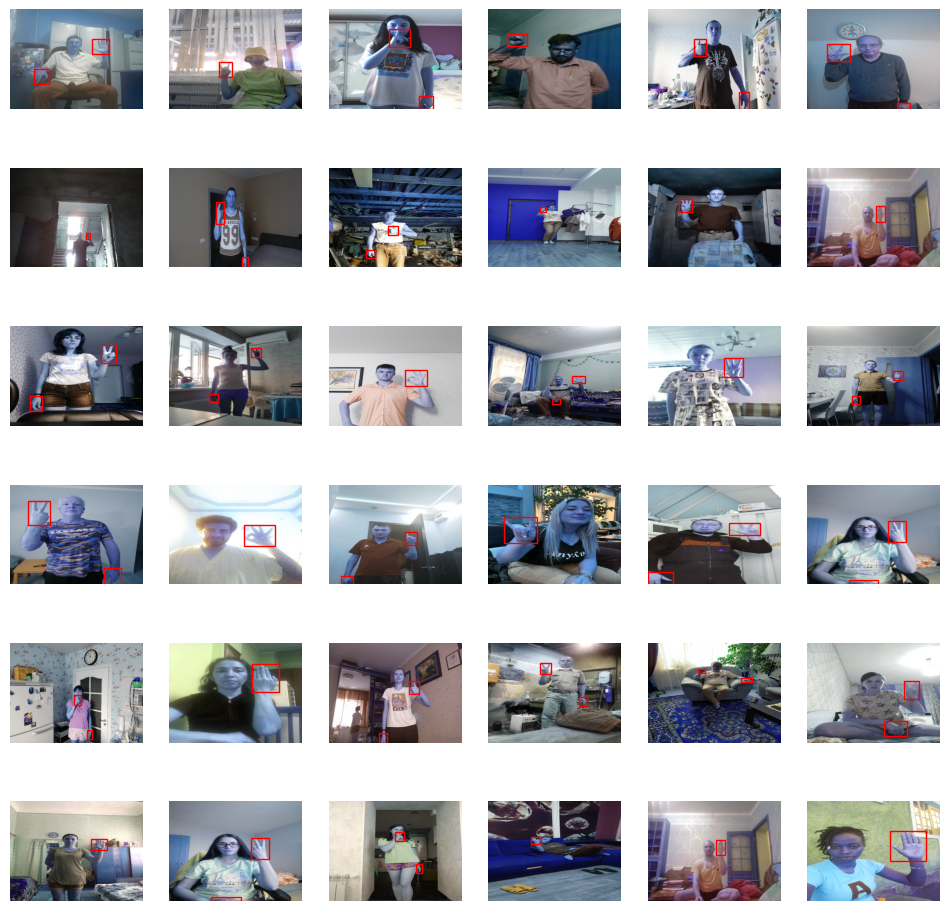

In [50]:
image_folder = '..\datasets\HAGRID\subsample'
annotation_folder = '..\datasets\HAGRID\\ann_subsample'

images = get_images(image_folder)
annotations = get_annotations(annotation_folder)

doublecheck(images, annotations)

### Split dataset

In [51]:
def train_test_split(images, annotations):
  """
    Using 1500 for training and 300 for validation
  """
  train_images, val_images, train_annotations, val_annotations = [], [], [], []
  idx = 0
  for anno in annotations:
    idx += 1
    img = get_image_with_name(anno[0], images)
    # Training set
    if idx <= 1500:
      train_images.append(img)
      train_annotations.append(anno)
    # Validation set
    else:
      val_images.append(img)
      val_annotations.append(anno)
  return train_images, val_images, train_annotations, val_annotations

In [ ]:
image_folder = '..\datasets\HAGRID\subsample'
annotation_folder = '..\datasets\HAGRID\\ann_subsample'

images = get_images(image_folder)
annotations = get_annotations(annotation_folder)

train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations)

print(len(train_images), len(train_annotations), len(val_images), len((val_annotations)))

for i in range(10):
  print(train_images[i])
  print(train_annotations[i])

### Convert to yolo format

In [56]:
import shutil

def convert_to_yolo(images, annotations, mode = 'train', width = 640, height = 480):
  # Define destination path
  if mode == 'train':
    img_des = '..\datasets\HAGRID_YOLO\images\\train'
    anno_des = '..\datasets\HAGRID_YOLO\labels\\train'
  else:
    img_des = '..\datasets\HAGRID_YOLO\images\\val'
    anno_des = '..\datasets\HAGRID_YOLO\labels\\val'

  # Working with each image's annotation
  for anno in annotations:
    name, boxes = anno[0], anno[1]
    save_file_name = name + '.txt'
    save_file_name = os.path.join(anno_des, save_file_name)

    # Move image to destination path
    img = get_image_with_name(name, images)
    des = name + '.png'
    des = os.path.join(img_des, des)
    shutil.move(img, des)

    # Create annotations files
    saved_str = ''
    for box in boxes:
      # Transform the bbox coordinates to the format required by YOLO
      xmin = float(box[0]) * width
      ymin = float(box[1]) * height
      xmax = xmin + float(box[2]) * width
      ymax = ymin + float(box[3]) * height

      # Get and normalize the coordinates by the dimensions of images
      center_x = ((xmin + xmax) / 2) / width
      center_y = ((ymin + ymax) / 2) / height
      box_width = float(box[2])
      box_height = float(box[3])

      # String to write to .txt file
      saved_str += str(0) + ' ' + str(center_x) + ' ' + str(center_y) + ' ' + str(box_width) + ' ' + str(box_height) + '\n'

    # Write information to file
    with open(save_file_name, 'w') as f:
      f.write(saved_str) 

In [57]:
image_folder = '..\datasets\HAGRID\subsample'
annotation_folder = '..\datasets\HAGRID\\ann_subsample'

images = get_images(image_folder)
annotations = get_annotations(annotation_folder)

train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations)

In [58]:
convert_to_yolo(val_images, val_annotations, mode = 'val')

### Resize images

In [10]:
import os
import cv2

def resize(source, destination, width = 640, height = 480):
  """
    Resize all images in source folder and save them in destination folder
  """
  images = os.listdir(source)
  for image in images:
    img = cv2.imread(os.path.join(source, image))
    img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(os.path.join(destination, image), img)

In [12]:
source = '..\datasets\HAGRID_YOLO\images\\train'
destination = '..\datasets\HAGRID_YOLO\images\\train_2'

resize(source, destination)

### Double check - 2

In [13]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def doublecheck(images, annotations, width = 640, height = 480):
  # Get 36 random annotations
  idlist = []
  for _ in range(36):
    idlist.append(random.randint(0, 1499))

  # List of all .txt files
  files = os.listdir(annotations)

  # Get all image paths from .txt files
  image_paths = []
  for f in files:
    path = f.replace('txt', 'png')
    path = os.path.join(images, path)
    image_paths.append(path)

  # Join all .txt files to annotations path
  for i in range(len(files)):
    files[i] = os.path.join(annotations, files[i])

  # Check each image
  h, w = 0, 0
  fig, ax = plt.subplots(6, 6, figsize = (12, 12))
  for idx in idlist:
    with open(files[idx], 'r') as f:
      lines = f.readlines()
      for line in lines:
        tmp = line.split()

        box_center_x = float(tmp[1]) * width
        box_center_y = float(tmp[2]) * height
        box_width = float(tmp[3]) * width
        box_height = float(tmp[4]) * height

        xtl = box_center_x - (box_width / 2)
        ytl = box_center_y - (box_height / 2)

        # Load image
        image = cv2.imread(image_paths[idx])

        # Visualize image
        ax[h, w].imshow(image)
        rect = patches.Rectangle((xtl, ytl), box_width, box_height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax[h, w].add_patch(rect)
        ax[h, w].axis('off')

      h += 1
      if h == 6:
        h = 0
        w += 1

  plt.savefig("..\datasets\HAGRID_YOLO\double_check.png", bbox_inches = 'tight')

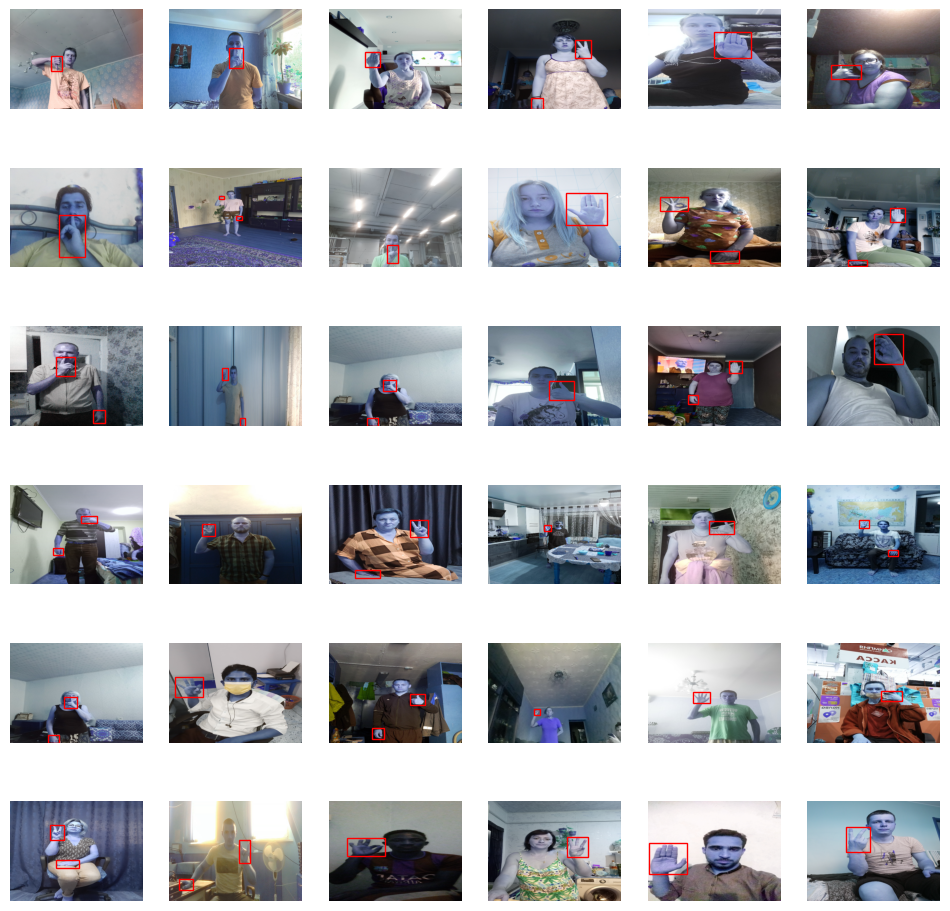

In [14]:
images = '..\datasets\HAGRID_YOLO\images\\train'
labels = '..\datasets\HAGRID_YOLO\labels\\train'

doublecheck(images, labels)